In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("monthly_milk.csv")
data.head()

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


In [10]:
data['month'] = pd.to_datetime(data['month'], format='%Y-%m')
data = data.set_index('month')

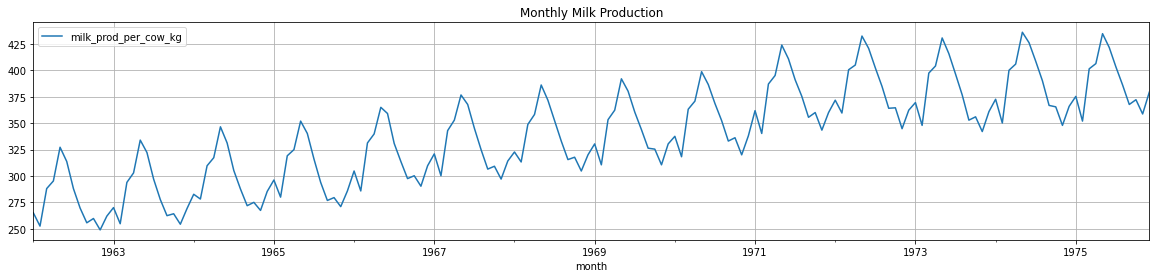

In [11]:
data.plot(figsize=(20,4))
plt.grid()
plt.legend(loc = 'best')
plt.title("Monthly Milk Production")
plt.show()


Can use Linear Interpolation to find missing values 

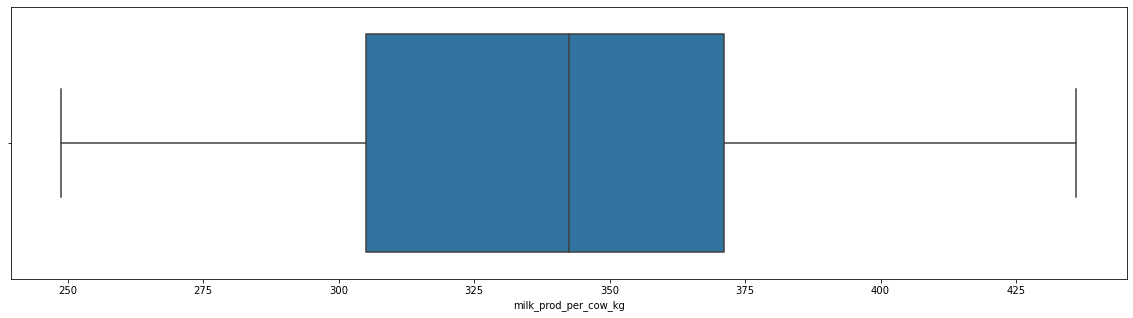

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(20,5))
ax = sns.boxplot(data['milk_prod_per_cow_kg'], whis = 1.5)

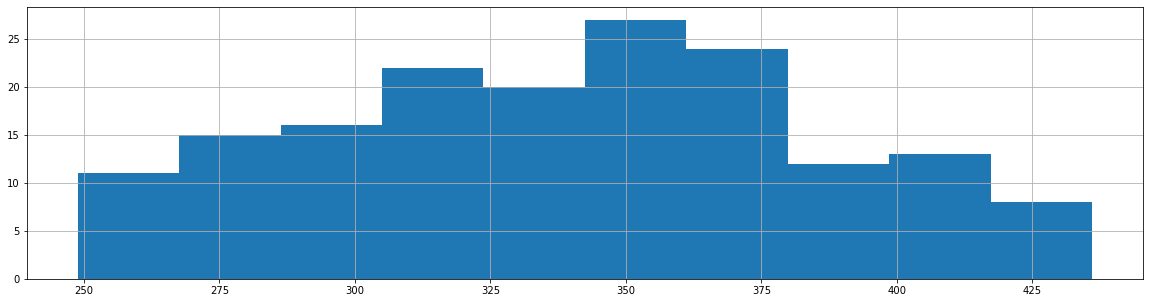

In [15]:
fig = data.milk_prod_per_cow_kg.hist(figsize=(20,5))

<function matplotlib.pyplot.show(close=None, block=None)>

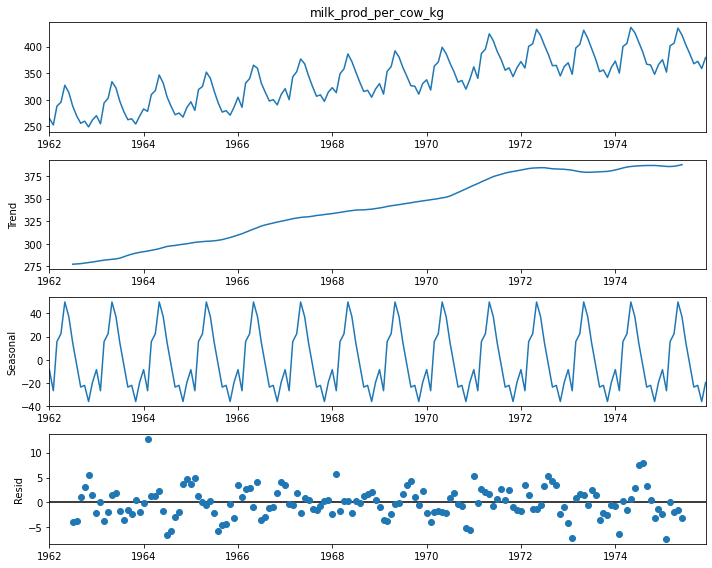

In [20]:
#Additive Seasonal Decomposition
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = (10,8)
decomposition = sm.tsa.seasonal_decompose(data.milk_prod_per_cow_kg, model ='additive')
fig = decomposition.plot()
plt.show

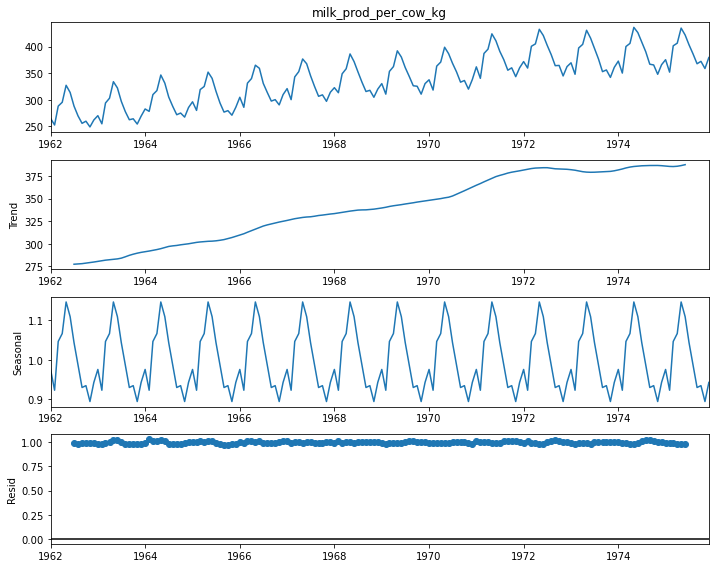

In [23]:
#Multiplicative model 
decomposition = sm.tsa.seasonal_decompose(data.milk_prod_per_cow_kg, model = 'multiplicative')
fig = decomposition.plot()
plt.show()

In [26]:
total_size = len(data)
train_size = math.floor(0.8*total_size)
train = data.head(train_size)
test = data.tail(len(data)-train_size)

In [27]:
y_hat_naive = test.copy()
y_hat_naive['naive forecast'] = train['milk_prod_per_cow_kg'][len(train)-1]

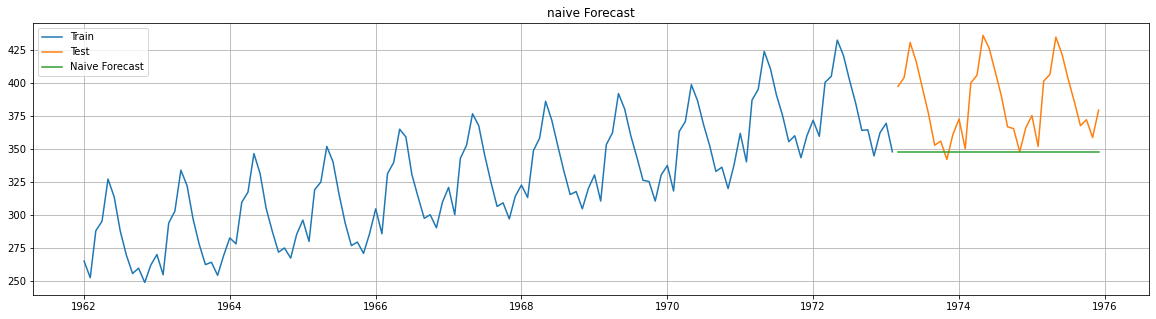

In [31]:
#plotting train, test and forecast
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['milk_prod_per_cow_kg'], label = 'Train')
plt.plot(test['milk_prod_per_cow_kg'], label = 'Test')
plt.plot(y_hat_naive['naive forecast'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title("naive Forecast")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['milk_prod_per_cow_kg'], y_hat_naive['naive forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['milk_prod_per_cow_kg']-y_hat_naive['naive forecast'])/test['milk_prod_per_cow_kg'])*100, 2)

In [34]:
print("results-")
print("rmse = ", + rmse)
print("mape = ", + mape)

results-
rmse =  46.76
mape =  9.57
